<a href="https://colab.research.google.com/github/ucsd-cse-spis-2025/SPIS25-Lauren-Diana-Final_Project/blob/main/Stock_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn import metrics

# Download latest version
path = kagglehub.dataset_download("camnugent/sandp500")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sandp500


In [35]:
df = pd.read_csv("/kaggle/input/sandp500/all_stocks_5yr.csv")
#df = df.head(100)


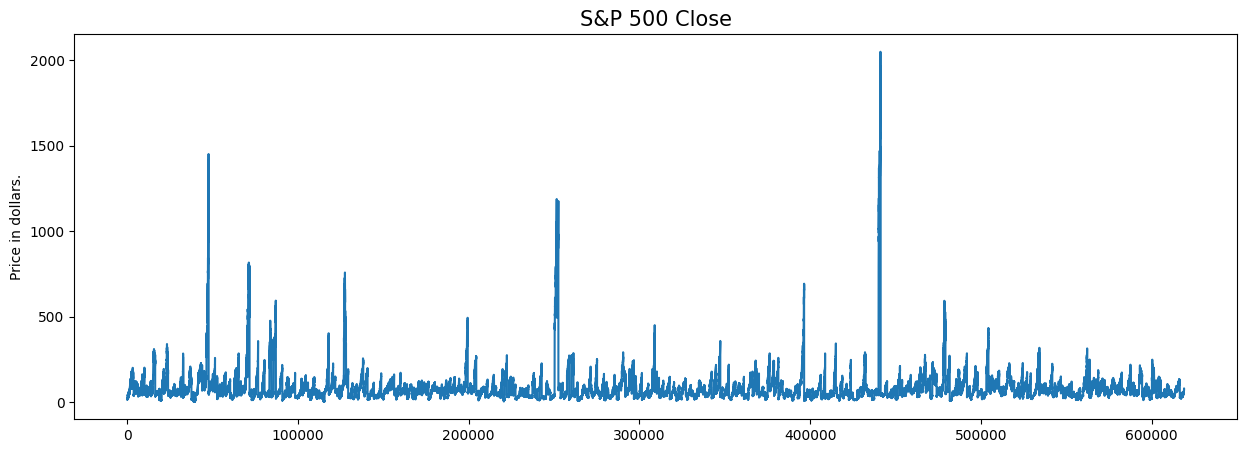

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('S&P 500 Close', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [37]:
df = df.dropna()
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [38]:
splitted = df['date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,date,open,high,low,close,volume,Name,day,month,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,8,2,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,11,2,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,12,2,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,13,2,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14,2,2013


In [39]:
# df['open-close']  = df['open'] - df['close']
# df['low-high']  = df['low'] - df['high']
# df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
# df.head()

df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

In [40]:
features = df[['open', 'high', 'low', 'close', 'volume', 'day', 'month', 'year']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(557126, 8) (61903, 8)


In [41]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
print(X_train.shape, X_valid.shape)

(557126, 1, 8) (61903, 1, 8)


In [42]:
regressor = Sequential()

# First layer
regressor.add(SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1], X_train.shape[2]))
              )

regressor.add(Dropout(0.2))

# Second layer
regressor.add(SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(Dropout(0.2))

# Third layer
regressor.add(SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(Dropout(0.2))

# Fourth layer
regressor.add(SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = False)
             )

regressor.add(Dropout(0.2))

# Dense layer for the final output
regressor.add(Dense(units = 1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# Compiler
regressor.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"])

In [ ]:
# Fit the model
history = regressor.fit(X_train, Y_train, epochs = 5, batch_size = 10, validation_data = (X_valid, Y_valid))

Epoch 1/5
55713/55713 ━━━━━━━━━━━━━━━━━━━━ 274s 5ms/step - accuracy: 0.5171 - loss: 0.6929 - val_accuracy: 0.5204 - val_loss: 0.6925
Epoch 2/5
55713/55713 ━━━━━━━━━━━━━━━━━━━━ 312s 5ms/step - accuracy: 0.5178 - loss: 0.6928 - val_accuracy: 0.5204 - val_loss: 0.6924
Epoch 3/5
32550/55713 ━━━━━━━━━━━━━━━━━━━━ 1:43 4ms/step - accuracy: 0.5199 - loss: 0.6927